# News Headlines Sentiment

Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. 

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
from newsapi import NewsApiClient

%matplotlib inline
load_dotenv()

True

In [2]:
# Read your api key environment variable
api_key = os.getenv("NEWS_API_KEY")

In [3]:
# Create a newsapi client
NewsAPI = NewsApiClient(api_key=api_key)

In [4]:
# Fetch the Bitcoin news articles
Bitcoin_Headlines = NewsAPI.get_everything(
        q="Bitcoin",
        language= "en",
        sort_by="relevancy"
)
print(f"Total Articles about Bitcoin: {Bitcoin_Headlines['totalResults']}")
Bitcoin_Headlines["articles"][0]

Total Articles about Bitcoin: 6630


{'source': {'id': 'techcrunch', 'name': 'TechCrunch'},
 'author': 'Romain Dillet',
 'title': 'Bitcoin passes $20k and reaches all-time high',
 'description': 'After reaching a previous all-time high on November 30th, 2020 and December 1st, 2020, bitcoin is now trading well above $20,000 and has surpassed its previous peak price. Bitcoin’s value has rapidly increased over the past two months. According to CoinMarket…',
 'url': 'http://techcrunch.com/2020/12/16/bitcoin-passes-20k-and-reaches-all-time-high/',
 'urlToImage': 'https://techcrunch.com/wp-content/uploads/2017/11/gettyimages-869865484.jpg?w=602',
 'publishedAt': '2020-12-16T17:12:40Z',
 'content': 'After reaching a previous all-time high on November 30th, 2020 and December 1st, 2020, bitcoin is now trading well above $20,000 and has surpassed its previous peak price.\r\nBitcoins value has rapidly… [+1062 chars]'}

In [39]:
# Fetch the Apple news articles
Apple_Headlines = NewsAPI.get_everything(
        q="Apple",
        language= "en",
        sort_by="relevancy"
)
print(f"Total Articles about Apple: {Apple_Headlines['totalResults']}")
Apple_Headlines["articles"][0]

Total Articles about Apple: 35780


{'source': {'id': 'engadget', 'name': 'Engadget'},
 'author': 'Cherlynn Low',
 'title': 'Two weeks with Apple Fitness+',
 'description': 'I’m at the stage of my pandemic fitness routine where if I finish a workout without having yelled in frustration, I have to wonder if the session was too easy. Whether it’s because I’ve grown bored or I’m getting stronger, I’ve struggled to find exercise vide…',
 'url': 'https://www.engadget.com/apple-fitness-plus-review-two-weeks-test-watch-music-workout-160058155.html',
 'urlToImage': 'https://o.aolcdn.com/images/dims?resize=1200%2C630&crop=1200%2C630%2C0%2C0&quality=95&image_uri=https%3A%2F%2Fs.yimg.com%2Fos%2Fcreatr-uploaded-images%2F2020-12%2F01953680-4aee-11eb-acfb-589043d0b91b&client=amp-blogside-v2&signature=62e57f529183d8248c2b9e8a568eafc3d27c4f0d',
 'publishedAt': '2020-12-31T16:15:58Z',
 'content': 'That’s something you won’t find on services from Fitbit and Samsung, which also offer workout content alongside their wearables. Similar to Fi

In [6]:
# Create the Bitcoin sentiment scores DataFrame
Bitcoin_Sentiment_Scores_DF = pd.DataFrame.from_dict(Bitcoin_Headlines["articles"])
Bitcoin_Sentiment_Scores_DF.head()

,source,author,title,description,url,urlToImage,publishedAt,content
0,"{'id': 'techcrunch', 'name': 'TechCrunch'}",Romain Dillet,Bitcoin passes $20k and reaches all-time high,After reaching a previous all-time high on Nov...,http://techcrunch.com/2020/12/16/bitcoin-passe...,https://techcrunch.com/wp-content/uploads/2017...,2020-12-16T17:12:40Z,After reaching a previous all-time high on Nov...
1,"{'id': None, 'name': 'Gizmodo.com'}",Rhett Jones,"Bitcoin Blows Past $20,000 Milestone",It’s been almost three years to the day since ...,https://gizmodo.com/bitcoin-blows-past-20-000-...,https://i.kinja-img.com/gawker-media/image/upl...,2020-12-16T15:15:00Z,Its been almost three years to the day since t...
2,"{'id': 'techcrunch', 'name': 'TechCrunch'}",Alex Wilhelm,Is rising usage driving crypto’s recent price ...,Do the price gains make sense in the short-ter...,http://techcrunch.com/2020/12/17/is-rising-usa...,https://techcrunch.com/wp-content/uploads/2020...,2020-12-17T16:01:42Z,Everything is dumb until it works.\r\nAs 2020 ...
3,"{'id': None, 'name': 'Gizmodo.com'}",Matt Novak,India Weighs 18% Tax on Bitcoin After Legaliza...,The government of India is considering an 18% ...,https://gizmodo.com/india-weighs-18-tax-on-bit...,https://i.kinja-img.com/gawker-media/image/upl...,2020-12-29T11:50:00Z,The government of India is considering an 18% ...
4,"{'id': None, 'name': 'Gizmodo.com'}",Jody Serrano,"Bitcoin Keeps Moving On Up, Reaching $33,000 i...",Just weeks after it shattered its yearslong as...,https://gizmodo.com/bitcoin-keeps-moving-on-up...,https://i.kinja-img.com/gawker-media/image/upl...,2021-01-03T03:03:00Z,Just weeks after it shattered its yearslong as...


In [40]:
# Create the Apple sentiment scores DataFrame
Apple_Sentiment_Scores_DF = pd.DataFrame.from_dict(Apple_Headlines["articles"])
Apple_Sentiment_Scores_DF.head()

,source,author,title,description,url,urlToImage,publishedAt,content
0,"{'id': 'engadget', 'name': 'Engadget'}",Cherlynn Low,Two weeks with Apple Fitness+,I’m at the stage of my pandemic fitness routin...,https://www.engadget.com/apple-fitness-plus-re...,https://o.aolcdn.com/images/dims?resize=1200%2...,2020-12-31T16:15:58Z,That’s something you won’t find on services fr...
1,"{'id': None, 'name': 'Lifehacker.com'}",David Murphy,How to Set Up Google Stadia on iOS if There's ...,"As you recall, Apple runs its App Store with a...",https://lifehacker.com/how-to-set-up-google-st...,https://i.kinja-img.com/gawker-media/image/upl...,2020-12-16T21:00:00Z,"As you recall, Apple runs its App Store with a..."
2,"{'id': 'engadget', 'name': 'Engadget'}",Igor Bonifacic,Apple is once again extending TV+ free trials,Apple will once again give some of its custome...,https://www.engadget.com/apple-extends-tv-plus...,https://o.aolcdn.com/images/dims?resize=1200%2...,2021-01-15T21:28:27Z,Apple will once again give some of its custome...
3,"{'id': None, 'name': 'Lifehacker.com'}",David Murphy,Up Your Selfie Video Game With This Apple Watc...,For those who haven’t yet splurged on a fancie...,https://lifehacker.com/up-your-selfie-video-ga...,https://i.kinja-img.com/gawker-media/image/upl...,2021-01-06T20:00:00Z,For those who havent yet splurged on a fancier...
4,"{'id': 'engadget', 'name': 'Engadget'}",Nick Summers,Apple will build a learning hub in Atlanta as ...,Apple has shed more light on its $100 million ...,https://www.engadget.com/apple-racial-equity-j...,https://o.aolcdn.com/images/dims?resize=1200%2...,2021-01-13T13:11:09Z,"In its press release, Apple also promised to o..."


In [41]:
# Describe the Bitcoin Sentiment DataFrame
Bitcoin_Sentiments = []
for article in Bitcoin_Headlines["articles"]:
    try:
        sentiment = analyzer.polarity_scores(article["content"])
        Bitcoin_Sentiments.append({
            "Date" : article["publishedAt"][:10],
            "Text": article["content"],
            "Compound": sentiment["compound"],
            "Positive": sentiment["pos"],
            "Negative": sentiment["neg"],
            "Neutral": sentiment["neu"]
        })
    except AttributeError:
        pass
# Create DataFrame
Bitcoin_Sentiment_DF = pd.DataFrame(Bitcoin_Sentiments)
# Reorder DataFrame columns
Columns =["Date", "Text", "Compound", "Positive", "Negative", "Neutral"]
Bitcoin_Sentiments_DF = Bitcoin_Sentiment_DF[Columns]
Bitcoin_Sentiments_DF.head()

,Date,Text,Compound,Positive,Negative,Neutral
0,2020-12-16,After reaching a previous all-time high on Nov...,0.6486,0.174,0.000,0.826
1,2020-12-16,Its been almost three years to the day since t...,0.4019,0.072,0.000,0.928
2,2020-12-17,Everything is dumb until it works.\r\nAs 2020 ...,0.2732,0.136,0.083,0.781
3,2020-12-29,The government of India is considering an 18% ...,-0.2924,0.000,0.059,0.941
4,2021-01-03,Just weeks after it shattered its yearslong as...,0.3612,0.171,0.080,0.749


In [42]:
# Describe the Apple Sentiment DataFrame
Apple_Sentiments = []
for article in Apple_Headlines["articles"]:
    try:
        sentiment = analyzer.polarity_scores(article["content"])
        text = article["content"]
        date = article["publishedAt"][:10]
        #sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        Apple_Sentiments.append({
            "Text": text,
            "Date": date,
            "Compound": compound,
            "Positive": pos,
            "Negative": neg,
            "Neutral": neu
        })
    except AttributeError:
        pass
# Create DataFrame
Apple_Sentiments_DF = pd.DataFrame(Apple_Sentiments)
# Reorder DataFrame columns
Columns = ["Date", "Text", "Compound", "Positive", "Negative", "Neutral"]
Apple_Sentiments_DF = Apple_Sentiments_DF[Columns]
Apple_Sentiments_DF.head()

,Date,Text,Compound,Positive,Negative,Neutral
0,2020-12-31,That’s something you won’t find on services fr...,0.2732,0.063,0.0,0.937
1,2020-12-16,"As you recall, Apple runs its App Store with a...",0.0000,0.000,0.0,1.000
2,2021-01-15,Apple will once again give some of its custome...,0.5106,0.084,0.0,0.916
3,2021-01-06,For those who havent yet splurged on a fancier...,0.7003,0.149,0.0,0.851
4,2021-01-13,"In its press release, Apple also promised to o...",0.8957,0.276,0.0,0.724


In [43]:
Bitcoin_Sentiments_DF.describe()

,Compound,Positive,Negative,Neutral
count,18.000000,18.000000,18.000000,18.000000
mean,0.266894,0.106889,0.039944,0.853167
std,0.400024,0.068355,0.057389,0.091525
min,-0.585900,0.000000,0.000000,0.675000
25%,0.006450,0.073000,0.000000,0.799750
50%,0.381550,0.133500,0.000000,0.857000
75%,0.571900,0.150750,0.078250,0.901500
max,0.801600,0.209000,0.176000,1.000000


In [44]:
Apple_Sentiments_DF.describe()

,Compound,Positive,Negative,Neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.251330,0.083100,0.028750,0.888200
std,0.393312,0.077866,0.036581,0.080373
min,-0.340000,0.000000,0.000000,0.724000
25%,-0.019300,0.032250,0.000000,0.840750
50%,0.200600,0.067000,0.000000,0.913500
75%,0.539700,0.107250,0.061000,0.940500
max,0.895700,0.276000,0.125000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: BitCoin is the highest mean positive score coming to 0.060950

Q: Which coin had the highest negative score?

A: Ethereum had the highest compound score 0.196 compared to BitCoin at 0.075

Q. Which coin had the highest positive score?

A: Ethereum had the highest positive score 0.318 compared to BitCoin at 0.174

---

# Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [12]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [13]:
from nltk.corpus import reuters, stopwords

# Code to download corpora
import nltk
nltk.download('stopwords')
nltk.download('reuters')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/miladnazar/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package reuters to
[nltk_data]     /Users/miladnazar/nltk_data...
[nltk_data]   Package reuters is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/miladnazar/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [14]:
# Expand the default stopwords list if necessary
Additional_Stopwords = [',', '', 'https', 'http', 'btc', 'ha', 'bitcoin', 'to', 'with', 'has', 'char', 'unlike', 'eth', 'u', 'is', 'its', 'has', 'with', 'bringing', 'ethereum', 'said', 'sent', 'found', 'today', 'following', 'announced', 'week', 'basically', 'also', 'weekly']

In [15]:
# Complete the tokenizer function
def tokenizer(Text):
    """Tokenizes text."""
   # Create a list of the words
    Text = word_tokenize(Text)
    
    # Convert the words to lowercase
    Text = [word.lower() for word in Text]
    
    # Remove the punctuation
    regex = re.compile("[^a-zA-Z ]")
    Text = [regex.sub('', word) for word in Text]
    
    # Remove the stop words
    sw = set(stopwords.words('english') + Additional_Stopwords)
    
    # Lemmatize Words into root words
    lemmatizer = WordNetLemmatizer()
    Text = [lemmatizer.lemmatize(word) for word in Text]
    Text = [word for word in Text if word not in sw]
    return Text

In [45]:
# Create a new tokens column for bitcoin
Bitcoin_Tokens = []
[Bitcoin_Tokens.append(tokenizer(Text)) for Text in Bitcoin_Sentiments_DF.Text]
Bitcoin_Sentiments_DF['Tokens'] = Bitcoin_Tokens
Bitcoin_Sentiments_DF.head()

,Date,Text,Compound,Positive,Negative,Neutral,Tokens
0,2020-12-16,After reaching a previous all-time high on Nov...,0.6486,0.174,0.000,0.826,"[reaching, previous, alltime, high, november, ..."
1,2020-12-16,Its been almost three years to the day since t...,0.4019,0.072,0.000,0.928,"[almost, three, year, day, since, price, wa, c..."
2,2020-12-17,Everything is dumb until it works.\r\nAs 2020 ...,0.2732,0.136,0.083,0.781,"[everything, dumb, work, come, close, cryptocu..."
3,2020-12-29,The government of India is considering an 18% ...,-0.2924,0.000,0.059,0.941,"[government, india, considering, tax, transact..."
4,2021-01-03,Just weeks after it shattered its yearslong as...,0.3612,0.171,0.080,0.749,"[shattered, yearslong, aspiration, reaching, v..."


In [46]:
# Create a new tokens column for Apple
Apple_Tokens = []
[Apple_Tokens.append(tokenizer(Text)) for Text in Apple_Sentiments_DF.Text]
Apple_Sentiments_DF['Tokens'] = Apple_Tokens
Apple_Sentiments_DF.head()

,Date,Text,Compound,Positive,Negative,Neutral,Tokens
0,2020-12-31,That’s something you won’t find on services fr...,0.2732,0.063,0.0,0.937,"[something, find, service, fitbit, samsung, of..."
1,2020-12-16,"As you recall, Apple runs its App Store with a...",0.0000,0.000,0.0,1.000,"[recall, apple, run, app, store, iron, fist, i..."
2,2021-01-15,Apple will once again give some of its custome...,0.5106,0.084,0.0,0.916,"[apple, give, customer, extra, month, tv, sinc..."
3,2021-01-06,For those who havent yet splurged on a fancier...,0.7003,0.149,0.0,0.851,"[havent, yet, splurged, fancier, setup, record..."
4,2021-01-13,"In its press release, Apple also promised to o...",0.8957,0.276,0.0,0.724,"[press, release, apple, promised, open, first,..."


---

# NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [18]:
from collections import Counter
from nltk import ngrams

In [19]:
# Generate the Bitcoin N-grams where N=2
Bitcoin_Bigram_Counts = [Counter(ngrams(Tokens, n=2)) for Tokens in Bitcoin_Sentiments_DF.Tokens]
dict(Bitcoin_Bigram_Counts[0].most_common(10))

{('reaching', 'previous'): 1,
 ('previous', 'alltime'): 1,
 ('alltime', 'high'): 1,
 ('high', 'november'): 1,
 ('november', 'th'): 1,
 ('th', 'december'): 1,
 ('december', 'st'): 1,
 ('st', 'trading'): 1,
 ('trading', 'well'): 1,
 ('well', 'surpassed'): 1}

In [47]:
# Generate the Apple N-grams where N=2
Apple_Bigram_Counts = [Counter(ngrams(Tokens, n=2)) for Tokens in Apple_Sentiments_DF.Tokens]
dict(Apple_Bigram_Counts[0].most_common(10))

{('something', 'find'): 1,
 ('find', 'service'): 1,
 ('service', 'fitbit'): 1,
 ('fitbit', 'samsung'): 1,
 ('samsung', 'offer'): 1,
 ('offer', 'workout'): 1,
 ('workout', 'content'): 1,
 ('content', 'alongside'): 1,
 ('alongside', 'wearable'): 1,
 ('wearable', 'similar'): 1}

In [21]:
# Use the token_count function to generate the top 10 words from each coin
def token_count(Tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(Tokens).most_common(N)

In [48]:
# Get the top 10 words for Bitcoin
Top10_Words_Bitcoin = []
for Tokens in Bitcoin_Sentiments_DF.Tokens:
    Top10_Words_Bitcoin += Tokens
token_count(Top10_Words_Bitcoin, 10)

[('cryptocurrency', 8),
 ('price', 6),
 ('year', 6),
 ('reuters', 6),
 ('value', 5),
 ('new', 5),
 ('wa', 4),
 ('photo', 4),
 ('previous', 3),
 ('alltime', 3)]

In [49]:
# Get the top 10 words for Apple
Top10_Words_Apple = []
for Tokens in Apple_Sentiments_DF.Tokens:
    Top10_Words_Apple += Tokens
token_count(Top10_Words_Apple, 10)

[('apple', 25),
 ('app', 6),
 ('company', 6),
 ('new', 6),
 ('service', 5),
 ('store', 5),
 ('device', 4),
 ('home', 4),
 ('month', 3),
 ('tv', 3)]

# Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [24]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

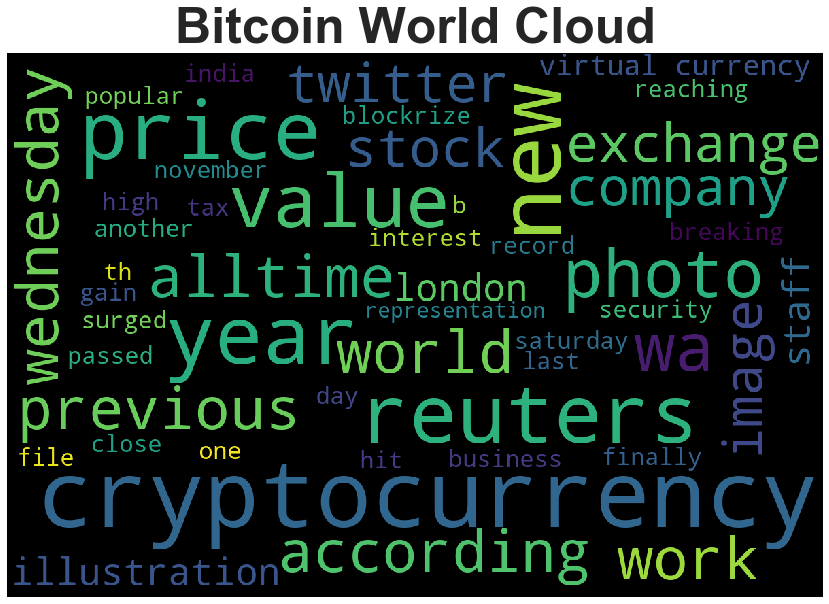

In [50]:
# Generate the Bitcoin word cloud
Bitcoin_WorldCloud = ' '.join(Top10_Words_Bitcoin)
wc = WordCloud(width=1200, height=800, max_words=50).generate(Bitcoin_WorldCloud)
plt.title("Bitcoin World Cloud", fontsize=50, fontweight="bold")
plt.axis("off")
plt.imshow(wc);

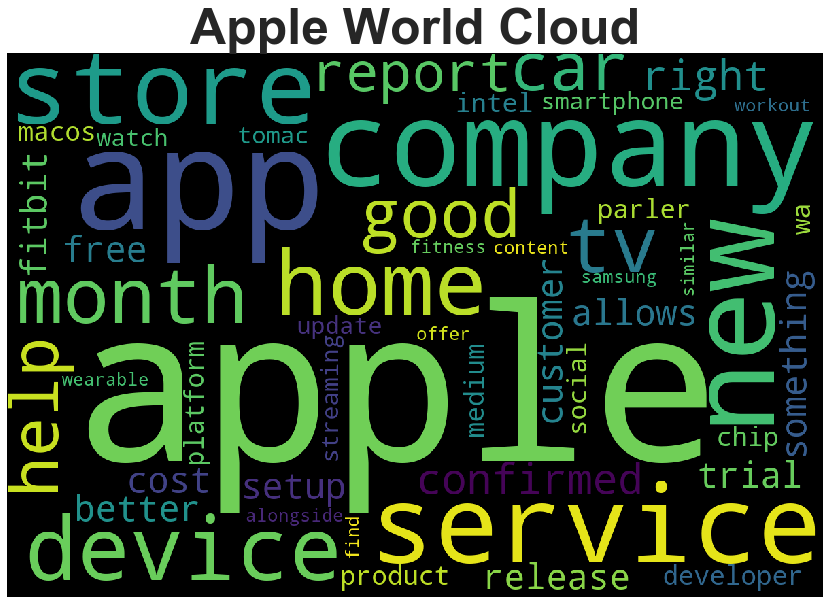

In [51]:
# Generate the Apple word cloud
Apple_WorldCloud = ' '.join(Top10_Words_Apple)
wc = WordCloud(width=1200, height=800, max_words=50).generate(Apple_WorldCloud)
plt.title("Apple World Cloud", fontsize=50, fontweight="bold")
plt.axis("off")
plt.imshow(wc);

# Named Entity Recognition

In this section, you will build a named entity recognition model for both coins and visualize the tags using SpaCy.

In [27]:
import spacy
from spacy import displacy

In [28]:
# Optional - download a language model for SpaCy
!python -m spacy download en_core_web_sm

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


In [29]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

## Bitcoin NER

In [52]:
# Concatenate all of the bitcoin text together
Bitcoin_Corpus = ' '.join(Bitcoin_Sentiments_DF["Text"].values)
Bitcoin_Corpus

"After reaching a previous all-time high on November 30th, 2020 and December 1st, 2020, bitcoin is now trading well above $20,000 and has surpassed its previous peak price.\r\nBitcoins value has rapidly… [+1062 chars] Its been almost three years to the day since the price of Bitcoin was close to breaking the $20,000 ceiling and came crashing down. On Wednesday, the arbitrary milestone of hodlers dreams was finally… [+1273 chars] Everything is dumb until it works.\r\nAs 2020 comes to a close, the cryptocurrency world is experiencing another late-year surge of consumer interest as prices climb in value. Bitcoin is over $23,000 a… [+1705 chars] The government of India is considering an 18% tax on all bitcoin transactions, according to a new report from the Times of India. Its not clear whether the proposed goods and services tax (GST) would… [+1397 chars] Just weeks after it shattered its yearslong aspiration of reaching $20,000 in value, Bitcoin is at it again. On Saturday, the cryptocur

In [53]:
# Run the NER processor on all of the text
NER_Processor = nlp(Bitcoin_Corpus)

# Add a title to the document
NER_Processor.user_data["title"] = "All the Article Text on BitCoin"

In [32]:
# Render the visualization
displacy.render(NER_Processor, style='ent')

In [33]:
# List all Entities
Bitcoin_Entities = [ent.text for ent in NER_Processor.ents]
Bitcoin_Entities_Set = set(Bitcoin_Entities)
Bitcoin_Entities[0:10]

['November 30th, 2020',
 'December 1st',
 '2020',
 'bitcoin',
 'above $20,000',
 'almost three years',
 'the day',
 'Bitcoin',
 '20,000',
 'Wednesday']

---

## Apple NER

In [54]:
# Concatenate all of the Apple text together
Apple_Corpus = ' '.join(Apple_Sentiments_DF["Text"].values)
Apple_Corpus

'That’s something you won’t find on services from Fitbit and Samsung, which also offer workout content alongside their wearables. Similar to Fitness +, Fitbit Premium costs $10 a month and includes a … [+3957 chars] As you recall, Apple runs its App Store with an iron fist. And itll be a cold day in Cupertino before the company allows game-streaming services to have regular ol appsnot unless the service submits … [+3082 chars] Apple will once again give some of its customers a few extra months of TV+. Since 2019, the company has offered a free one-year trial of the service with the purchase of a new device. When Apple firs… [+688 chars] For those who havent yet splurged on a fancier setup for recording videos at home, know that your smartphones camera (ideally coupled with a better microphone that you clip to your body) is good enou… [+1889 chars] In its press release, Apple also promised to open a “first of its kind” Apple Developer Academy in Detroit. It will help and inspire young B

In [61]:
# Run the NER processor on all of the text
NER_Processor_AAPL = nlp(Apple_Corpus)

# Add a title to the document
NER_Processor_AAPL.user_data["title"] = "All the Article Text on Apple"

In [62]:
# Render the visualization
displacy.render(NER_Processor_AAPL, style='ent')

In [65]:
# List all Entities
Apple_Entities = [ent.text for ent in NER_Processor_AAPL.ents]
Apple_Entities_Set = set(Apple_Entities)
Apple_Entities_Set

{'10',
 '2019',
 '2021',
 '2024',
 '9to5Mac',
 'Alex Castro',
 'App',
 'App Store',
 'Apple',
 'Apple Arcade',
 'Apple Developer Academy',
 'Apple TV',
 'Apples M1',
 'COVID',
 'Capybara Games',
 'Cupertino',
 'Detroit',
 'February',
 'Fitbit and Samsung',
 'Fitness +, Fitbit Premium',
 'Friday',
 'Hyundai',
 'Intel',
 'July 202',
 'Korean',
 'Last month',
 'Lens Technology',
 'Microsoft',
 'One',
 'Oregonian',
 'Parler',
 'Pat Gelsinger',
 'SOS',
 'Sworcery',
 'Sword',
 'TechCrunch',
 'The Apple Car',
 'The Verge',
 'This year',
 'Uyghur',
 'Xinjiang',
 'a few extra months of TV+',
 'a holiday season',
 'an M1 Mac',
 'app',
 'evening',
 'first',
 'iPhone',
 'it’l',
 'one-year',
 'single-day',
 'the App Store',
 'the Nintendo Switch',
 'three',
 'today',
 'watchOS',
 'year-long'}

In [38]:
print("MarkDown")
print("========")
print("Ethereum is the highest mean positive score coming to 0.060950")
print("Ethereum had the highest compound score 0.196 compared to BitCoin at 0.075")
print("Ethereum had the highest positive score 0.318 compared to BitCoin at 0.174")

MarkDown
Ethereum is the highest mean positive score coming to 0.060950
Ethereum had the highest compound score 0.196 compared to BitCoin at 0.075
Ethereum had the highest positive score 0.318 compared to BitCoin at 0.174
